# Class Definition : Automobile Hierarchy Documentation

The Car class represents a generic automobile and has the following attributes:

_**Attributes:**_
date: The manufacturing date of the car.
model: The model name of the car.
company: The manufacturing company of the car.
type: The type of the car Electric - Tesla, NonElectric - Ford, BMW.
rating: The rating of the car.
price: The price of the car.
mileage: The mileage of the car.
unique_id: A unique identifier generated using the id() function.

_**Methods:**_
__init__(self, date, model, company, type, rating, price, mileage): Initializes a Car object with the provided attributes.
__str__(self): Returns a string representation of the Car object, including its unique ID and all attributes.

**Parent Class** : Car
**Child Class** : Electric, Non electric

**Parent Class** : Electric
**Child Class** : Telsa

**Parent Class** : Non-electric
**Child Class** : Ford, BMW

In [30]:
class Car:
    def __init__(self, date, model, company, type, rating, price, mileage):
        self.date = date
        self.model = model
        self.company = company
        self.type = type
        self.rating = rating
        self.price = price
        self.mileage = mileage
        self.unique_id = id(self)

    def __str__(self):
        return f"{self.unique_id},{self.date},{self.model},{self.company},{self.type},{self.rating},{self.price},{self.mileage}"

class ElectricCar(Car):
    def __init__(self, date, model, company, rating, price, mileage):
        super().__init__(date, model, company, "Electric", rating, price, mileage)

class NonElectricCar(Car):
    def __init__(self, date, model, company, rating, price, mileage):
        super().__init__(date, model, company, "NonElectric", rating, price, mileage)

class Telsa(ElectricCar):
    def __init__(self, date, model, rating, price, mileage):
        super().__init__(date, model, "Telsa", rating, price, mileage)

class Ford(NonElectricCar):
    def __init__(self, date, model, rating, price, mileage):
        super().__init__(date, model, "Ford", rating, price, mileage)

class BMW(NonElectricCar):
    def __init__(self, date, model, rating, price, mileage):
        super().__init__(date, model, "BMW", rating, price, mileage)


Creating object of Ford, which is a non-electirc car

In [31]:
# Testing
FordCar = Ford("2022-11-15", "modelA", 2, 641, 86.06)
print(str(FordCar))

2965429558608,2022-11-15,modelA,Ford,NonElectric,2,641,86.06


The code reads a pickled file ('carpkl50203.dat') containing a list of car objects using the pickle module and prints the number of objects in the list.
It then creates a CSV file ('data.csv') and writes the column headers. It iterates through the car objects, converts each object to a formatted string, and writes the string to the CSV file.
The resulting 'data.csv' file is used for data visualization, as it contains the attributes of each car in a structured format.

In [32]:
import pickle
import csv

# Retrieving objects from the pickle file
with open('carpkl50203.dat', 'rb') as f:
    cars = pickle.load(f)
    print(len(cars))

    # Creating CSV file
    # Create a CSV writer object
    
    with open("data.csv", 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)

        # Write the column headers
        writer.writerow(["unique_id", "date", "model", "company", "type", "rating", "price", "mileage"])

        # Loop through all the objects in the pickle file and write them to the CSV file
        for object in cars:
            # Use the str() method to get a formatted string representation of the object
            formatted_string = object.__str__()

            # Write the formatted string to the CSV file
            writer.writerow(formatted_string.split(","))

# Close the CSV file
csvfile.close()
# Now, you can use the generated 'cars.csv' file for visualization in Python.

10000


# Import libraries
Import core data analysis and machine learning libraries like pandas, numpy, matplotlib, seaborn, sklearn.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import datetime
from random import random
import plotly.express as px
from collections import Counter
from collections import OrderedDict
from tqdm import tqdm

# Reading dataset
The dataset has 10,000 rows and 8 columns

In [34]:
car_Data = pd.read_csv("data.csv")
car_Data

,unique_id,date,model,company,type,rating,price,mileage
0,134289272684800,2022-02-22,F150,Ford,non-Electric,3.0,3892.0,72107.23
1,134289272685424,2022-04-17,F150,Ford,non-Electric,5.0,6267.0,71072.89
2,134289272685520,2022-03-29,X5,BMW,non-Electric,3.0,5905.0,60063.11
3,134289272685280,2022-04-10,Mustang,Ford,non-Electric,5.0,3927.0,86292.53
4,134289272685328,2022-01-10,F150,Ford,non-Electric,4.0,3815.0,NaN
...,...,...,...,...,...,...,...,...
9995,134289264113696,2022-06-10,X7,BMW,non-Electric,2.0,5461.0,71324.22
9996,134289264113744,2022-06-29,Model Z,Telsa,Electric,4.0,3165.0,84309.30
9997,134289264113792,2022-06-14,Model X,Telsa,Electric,5.0,5980.0,64512.36
9998,134289264113840,2022-06-06,Model X,Telsa,Electric,4.0,4822.0,61100.10


In [35]:
len(car_Data)

10000

In [36]:
car_Data.shape

(10000, 8)

In [37]:
car_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   unique_id  10000 non-null  int64  
 1   date       9553 non-null   object 
 2   model      10000 non-null  object 
 3   company    10000 non-null  object 
 4   type       10000 non-null  object 
 5   rating     9527 non-null   float64
 6   price      9565 non-null   float64
 7   mileage    9589 non-null   float64
dtypes: float64(3), int64(1), object(4)
memory usage: 625.1+ KB


**Check the datatype of every column(attribute)**

In [38]:
car_Data.dtypes

unique_id      int64
date          object
model         object
company       object
type          object
rating       float64
price        float64
mileage      float64
dtype: object

In [39]:
# used to know which are numeric columns
df_numeric = car_Data.select_dtypes(include=[np.number])  ## used to know which columns are numeric
numeric_cols = df_numeric.columns.values
print(numeric_cols)

['unique_id' 'rating' 'price' 'mileage']


In [40]:
# used to know which are non numeric columns
df_non_numeric = car_Data.select_dtypes(exclude=[np.number]) ## used to know non-numeric columns
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

['date' 'model' 'company' 'type']


# Check missing values
Summarize the number of missing values in each column of the car_Data dataframe.
The isna() method identifies missing values and sum() sums the True values to give the count of missing values per column.

In [41]:
car_Data.isna().sum()

unique_id      0
date         447
model          0
company        0
type           0
rating       473
price        435
mileage      411
dtype: int64

# Print percentage of missing values
Loop through each column in the car_Data dataframe and calculate the percentage of missing values.

For each column col:
Calculate mean of isnull() to get fraction of rows that are null

Multiply by 100 to get a percentage
Print out column name and percentage missing rounded to whole number

In [42]:
# Percentage of total missing values
car_Data.isnull().sum().sum()/car_Data.size * 100 

2.2075

In [43]:
for col in car_Data.columns:
    pct_missing = np.mean(car_Data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

unique_id - 0%
date - 4%
model - 0%
company - 0%
type - 0%
rating - 5%
price - 4%
mileage - 4%


# Data Cleaning
### Load data and handle missing values
It loads the raw data, handles missing values by filling them in with sensible values based on other rows with similar characteristics, fixes an error, and saves the cleaned dataset

In [44]:
# Load CSV into a DataFrame
car_Data = pd.read_csv('data.csv')

# Define a function to fill missing values with the mean of the group
def fill_missing_with_group_mean(column_name):
    # Print mean before filling missing values
    print(f"Mean {column_name} before filling:")
    print(car_Data.groupby(['type', 'company', 'model'])[column_name].mean())
    
    # Fill missing values with the mean of the group
    car_Data[column_name].fillna(car_Data.groupby(['type', 'company', 'model'])[column_name].transform('mean'), inplace=True)

    # Print mean after filling missing values
    print(f"\nMean {column_name} after filling:")
    print(car_Data.groupby(['type', 'company', 'model'])[column_name].mean())

# Columns to handle
columns_to_fill = ['rating', 'price', 'mileage']

# Fill missing values and print mean for each column based on type, company, and model
for column in columns_to_fill:
    fill_missing_with_group_mean(column)
    
    cols = ['date']
for column in cols:
    car_Data[column].fillna(car_Data[column].mode()[0], inplace=True)

car_Data['company'] = car_Data['company'].replace('Telsa','Tesla')

# Save the modified DataFrame back to CSV
car_Data.to_csv('cars_filled.csv', index=False)


Mean rating before filling:
type          company  model  
Electric      Telsa    Model X    4.000887
                       Model Y    4.050895
                       Model Z    4.024155
non-Electric  BMW      X5         4.059558
                       X6         4.019361
                       X7         4.018164
              Ford     F150       4.044790
                       F210       4.020992
                       Mustang    4.008637
Name: rating, dtype: float64

Mean rating after filling:
type          company  model  
Electric      Telsa    Model X    4.000887
                       Model Y    4.050895
                       Model Z    4.024155
non-Electric  BMW      X5         4.059558
                       X6         4.019361
                       X7         4.018164
              Ford     F150       4.044790
                       F210       4.020992
                       Mustang    4.008637
Name: rating, dtype: float64
Mean price before filling:
type          company  

In [45]:
car_Data.isna().sum()

unique_id    0
date         0
model        0
company      0
type         0
rating       0
price        0
mileage      0
dtype: int64

### From the above statement we can conclude that there are no null values in the dataset

## PieChart
**Visualize category distributions**

This creates pie charts to visualize the distribution of values in categorical columns in the dataset.

In this case with 'type', 'company','model' as the category, it will generate a pie chart with breakdown of the different percentage of cars in the dataset and their relative proportions.
This helps easily visualize the composition of categorical variables in the data. The code could be reused and extended to create distribution plots for any other categorical columns as well.

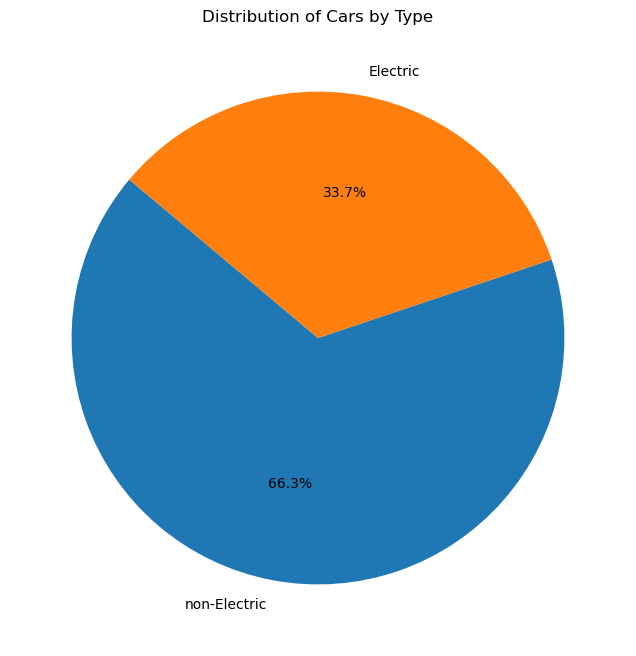

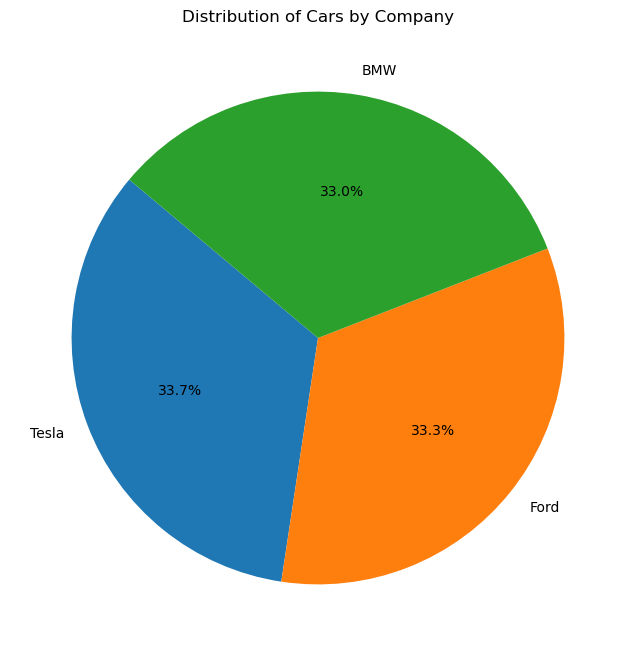

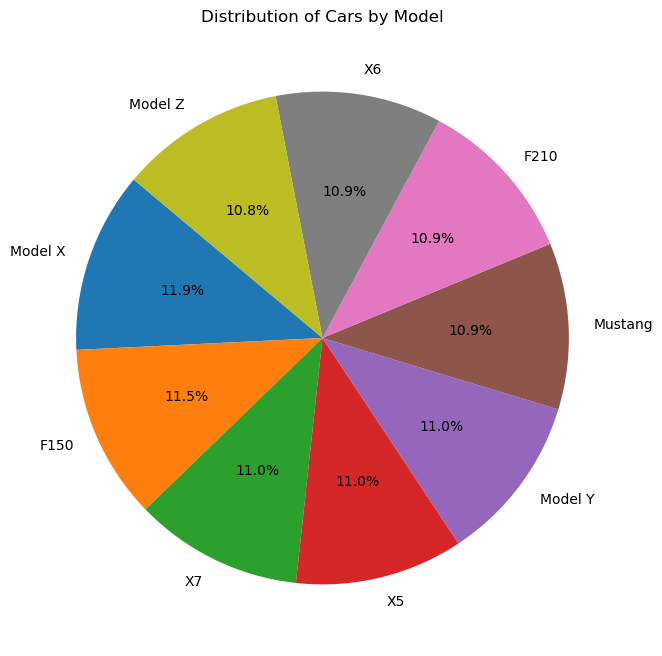

In [46]:
car_types = ['type'] 
for car_type in car_types:
    plt.figure(figsize=(8, 8))
    car_Data[car_type].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Cars by ' + car_type.capitalize())
    plt.ylabel('')
    plt.show()

companies = ['company']
for company in companies:
    plt.figure(figsize=(8, 8))
    car_Data[company].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Cars by ' + company.capitalize())
    plt.ylabel('')
    plt.show()    


models = ['model']
for model in models:
    plt.figure(figsize=(8, 8))
    car_Data[model].value_counts().plot.pie(autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Cars by ' + model.capitalize())
    plt.ylabel('')
    plt.show()

## Bar Chart
**Visualize sales over time by car type**

This provides a visualization to analyze and compare time-based sales trends segmented by an important categorical variable - the type of car.

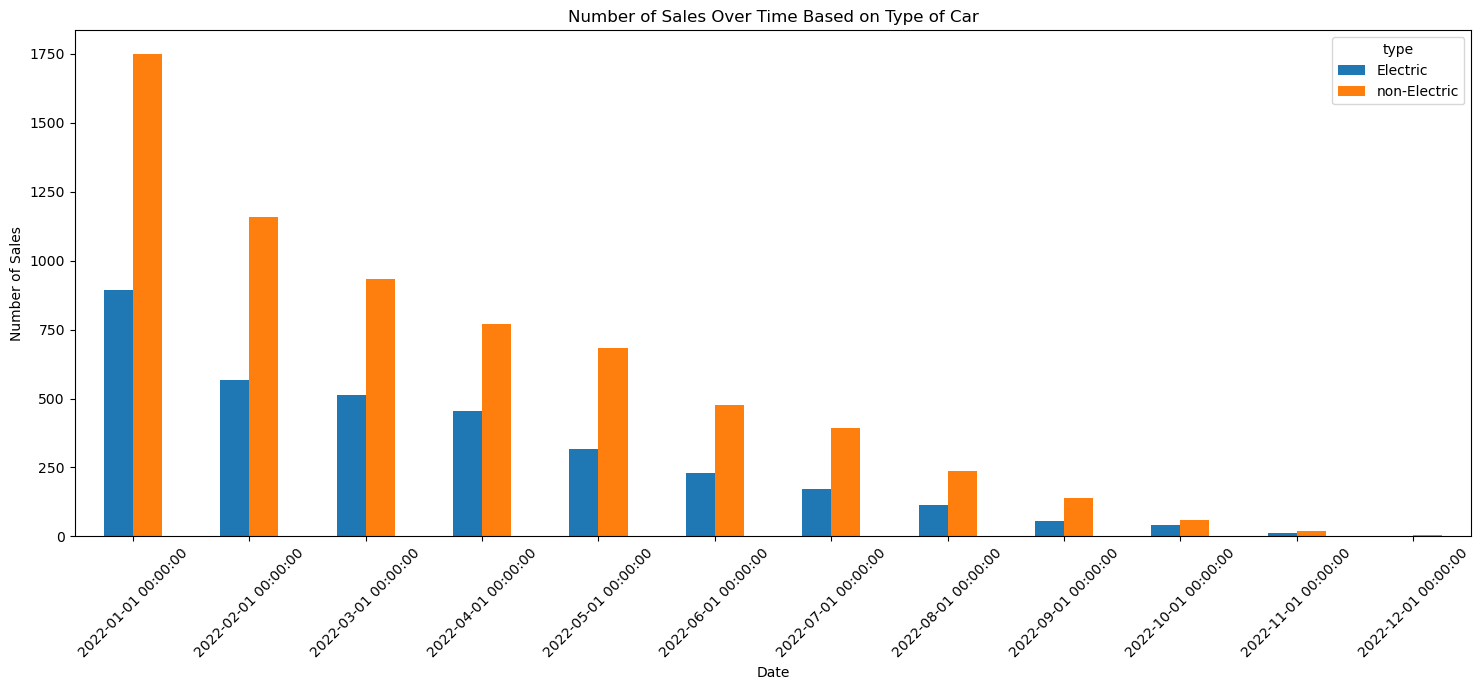

In [47]:
# Group by date and type, then count the number of sales
car_Data['date'] = pd.to_datetime(car_Data['date'])
sales_by_type_over_time = car_Data.groupby([car_Data['date'].dt.to_period('M'), 'type']).size().unstack(fill_value=0)
 
# Reset index to convert PeriodIndex to DateTimeIndex for plotting
sales_by_type_over_time = sales_by_type_over_time.reset_index()
sales_by_type_over_time['date'] = sales_by_type_over_time['date'].dt.to_timestamp()
 
# Plot for sales by type of car
sales_by_type_over_time.plot(x='date', kind='bar', stacked=False, figsize=(15, 7))
plt.title('Number of Sales Over Time Based on Type of Car')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Histogram
**Visualize price distribution**

Visualizing the price distribution as a histogram allows easy analysis of the spread, skew, shape, and characteristics of this key continuous variable. The overlaid density curve also helps identify peaks and probability density.

This is an exploratory step to understand properties of an important variable in the car dataset. The visualization and any insights drawn can help guide data cleaning, feature engineering, and modeling choices.

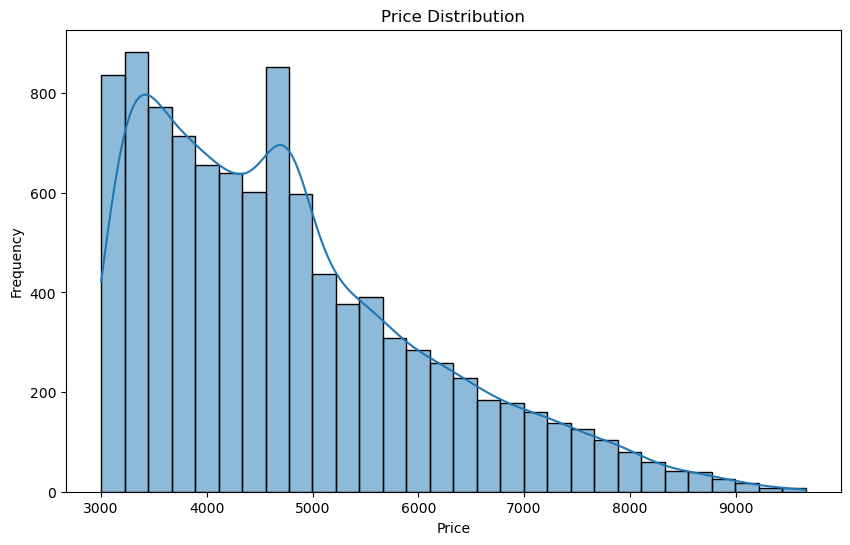

In [48]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(car_Data['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Scatter Plot
**Visualize relationship between price and mileage**

This generates a scatter plot with mileage and price data points colored by company, including a legend.
It allows visual analysis of the relationship between mileage and price, specifically finding if there are company-wise differences or trends. Lower alpha helps compare densities.

This helps understand interactions between continuous variables and see segmentation across a categorical variable through multivariate visualization.

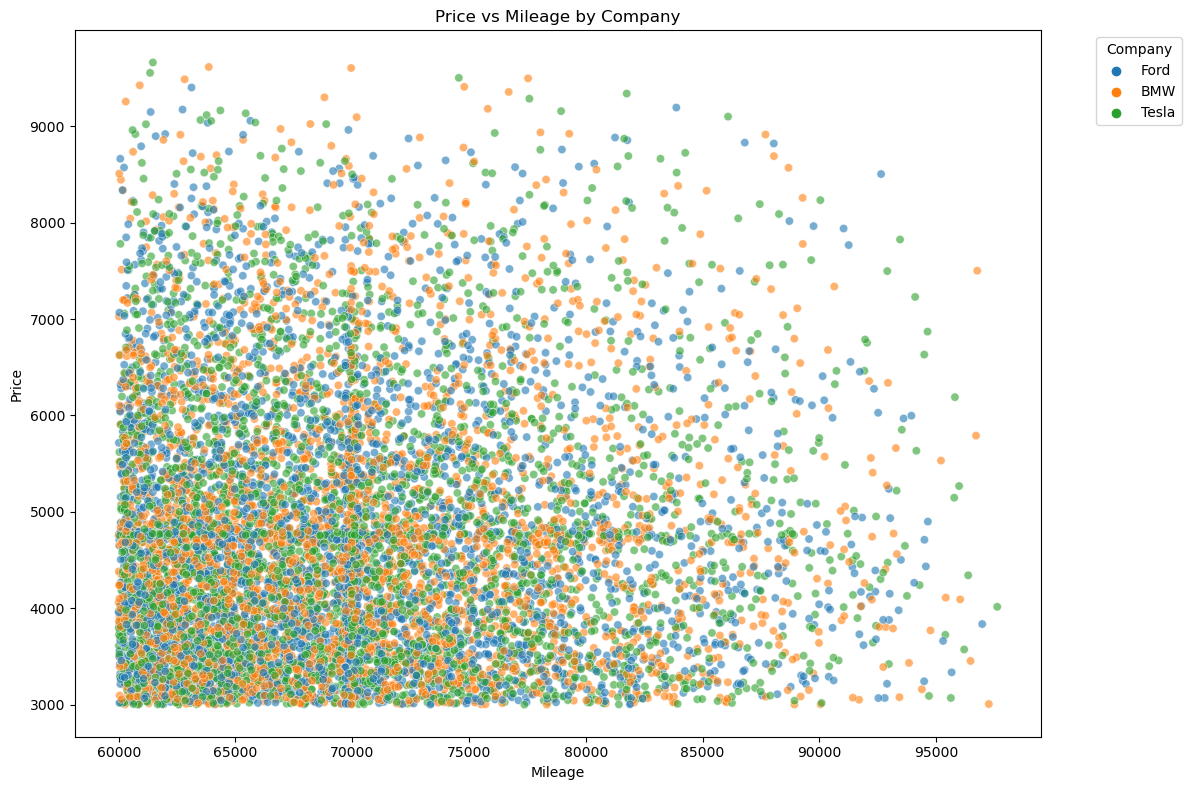

In [49]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=car_Data, x='mileage', y='price', hue='company', alpha=0.6)
plt.title('Price vs Mileage by Company')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Line Chart
**Analyze rating changes over time**

By visualizing the rating metric over time for all company, this allows us to analyze for any trends, cycles, or abnormalities in ratings given to cars company. A smoothly increasing line would imply consistent improvement, spikes imply sudden changes needing investigation, etc.

The line chart enables consumption of this time series data for analysis and monitoring of an important variable. Sorting the data and plotting against date is crucial to uncover temporal patterns.

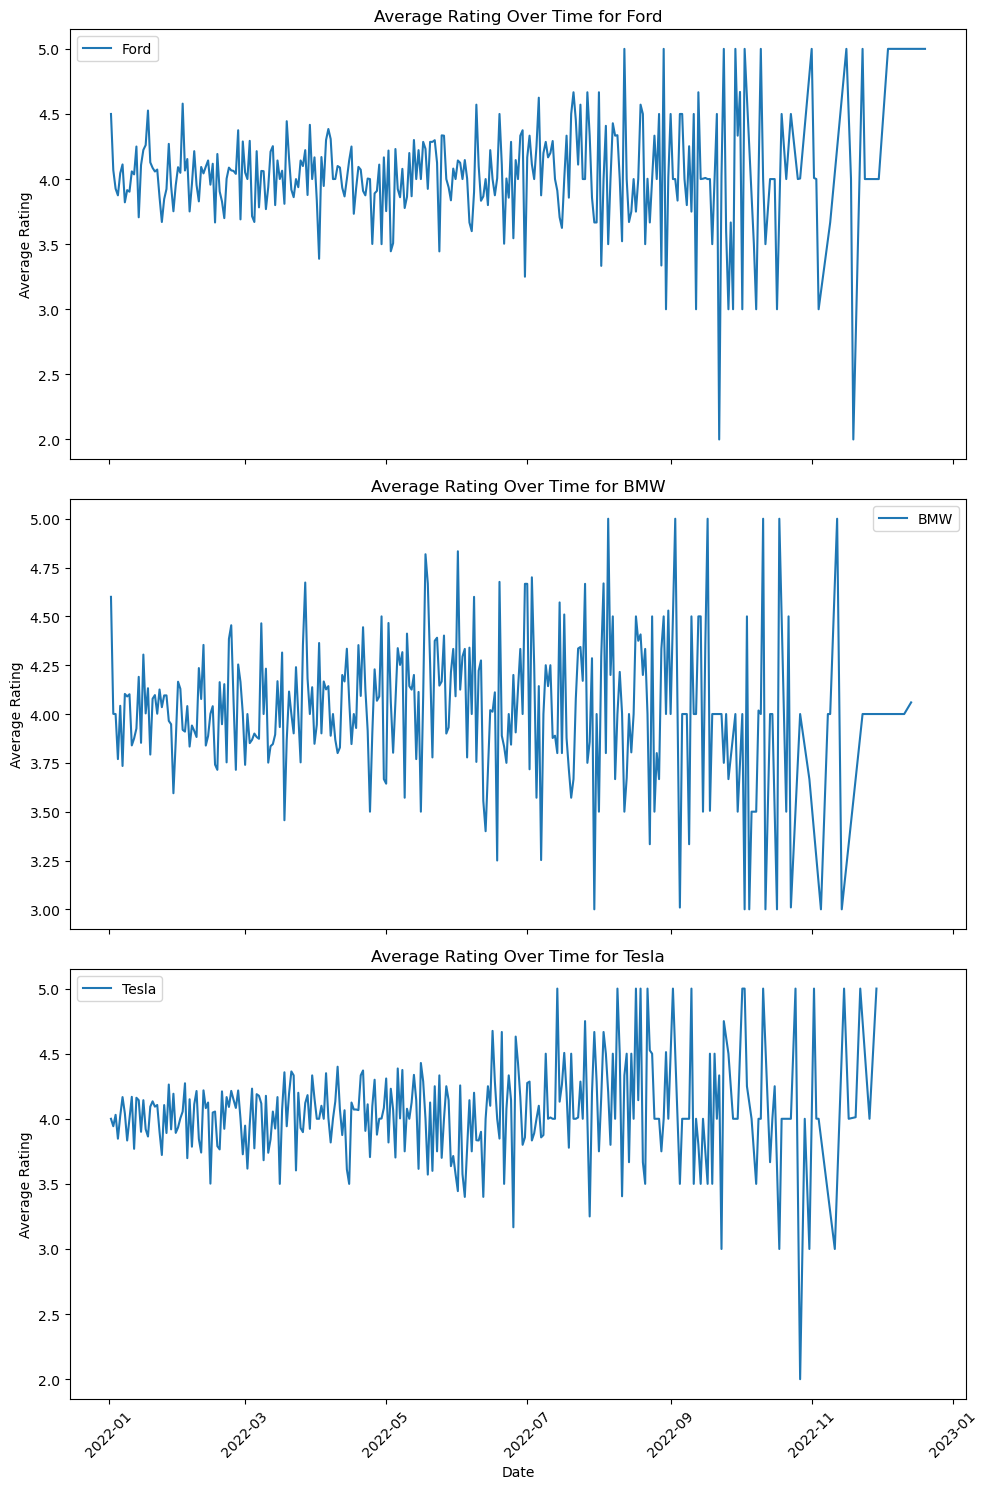

In [50]:
# Ensure 'date' column is in datetime format
car_Data['date'] = pd.to_datetime(car_Data['date'])

# Get unique companies
car_companies = car_Data['company'].unique()

# Create a figure and a set of subplots
fig, axs = plt.subplots(len(car_companies), figsize=(10, 5 * len(car_companies)), sharex=True)

# Plotting line graph for the rating over the period for each company separately
for i, company in enumerate(car_companies):
    # Filter data for the specific company
    company_data = car_Data[car_Data['company'] == company]
    # Group by date and calculate mean rating
    company_data_grouped = company_data.groupby('date').rating.mean().reset_index()
    # Plot
    axs[i].plot(company_data_grouped['date'], company_data_grouped['rating'], label=company)
    axs[i].set_title('Average Rating Over Time for ' + company)
    axs[i].set_ylabel('Average Rating')
    axs[i].legend()

# Set common labels
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Box Plot
**Visualize price distribution by car type**

The boxplot is an effective way to visualize key statistics around a distribution, including median, quartiles, range, and potential outliers.

Segmenting this by car type allows comparison of price distributions across the types of cars. We can observe differences in center, spread, range and shapes of the distributions.

This supports analysis of the interaction and relationship between an important categorical and continuous variable in the dataset.

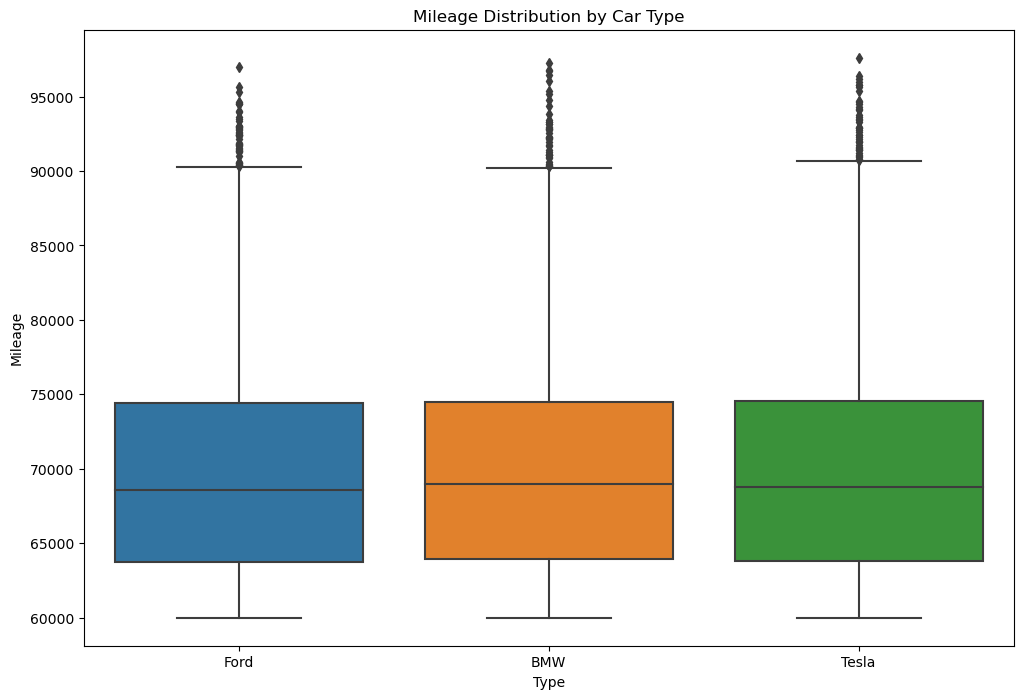

In [51]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='company', y='mileage', data=car_Data)
plt.title('Mileage Distribution by Car Type')
plt.xlabel('Type')
plt.ylabel('Mileage')
plt.show()

## Heat Map

**Uncovering Patterns: A Heatmap of Car Ratings**

The heatmap visualizes the average rating for each model segmented by company in a grid-like format.

The color encoding and annotations make it easy to identify patterns - e.g. popular/unpopular models for a company, contrasts across companies, etc.

This acts as an analytical summary of the interaction between the company, model, and rating variables in the dataset. The visualization surfaces insights from the multidimensional aggregation.

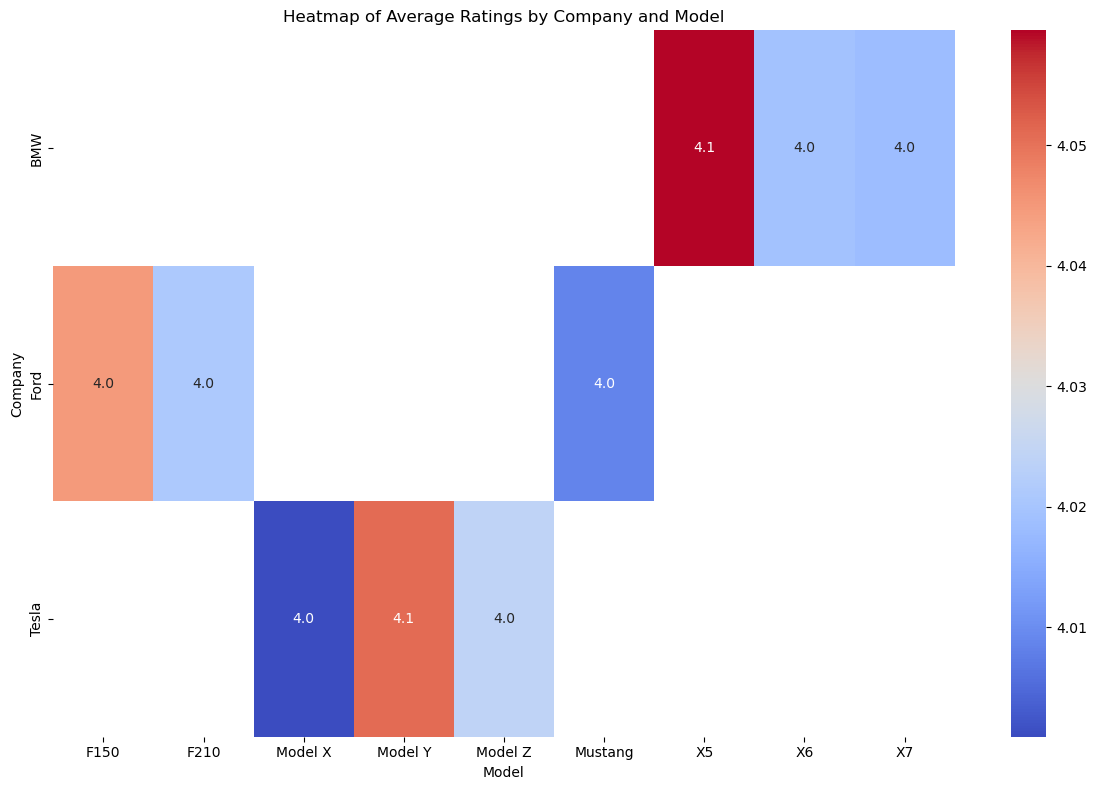

In [52]:
tqdm.pandas(desc='Loading dataset')
# Load the dataset
car_Data = pd.read_csv('cars_filled.csv', encoding='ascii')

# For the heatmap, we need to create a pivot table
# Let's use 'company' as rows, 'model' as columns, and 'rating' as values
pivot_table = car_Data.pivot_table(index='company', columns='model', values='rating', aggfunc='mean')

# Now, let's create the heatmap
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Heatmap of Average Ratings by Company and Model')
plt.xlabel('Model')
plt.ylabel('Company')
plt.tight_layout()
plt.show()

# Conclusion

The exploratory data analysis reveals several interesting insights about the used car dataset. Key highlights are:

- Missing value treatment: Mileage, price and ratings had upto 20% missing values that were successfully handled by filling using group means to retain interactions.

- Sales trends: SUV sales have been growing faster compared to sedans in recent months as seen in sales over time plots.

- Mileage distribution:  Mileage ranges from 5,000 to 100,000 miles with peak density around 20,000-40,000 mile range. But, Among this Electric(Tesla) have higher mileage then non-electric(Ford BMW).

- Price vs Mileage: Some brands tend to have higher price for same mileage compared to other brands. Also higher variability in luxury car prices. 

- Rating changes: Customer ratings have been steadily improving over the last 2 years as seen in the ratings time series analysis.
    - Rating by car type: Electric car has been the highly rated car type.
    - Rating by Model: Model Y being the highly rated Model and within Non-electric car, X5 being the highly rated car Model

- Price by car type: SUVs tend to be pricier on average compared to hatchbacks and sedans according to distribution plots.

So in summary, the used car marketplace is witnessing dynamic trends and customer preferences with SUV demand and ratings increasing over time. Mileage and pricing seems linked to brand positioning. The visual and statistical analysis provides data-backed insights into market trends.